In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

plt.rcParams["figure.figsize"]=(30,15)

In [5]:
df = pd.read_csv("data/4_tabla_sin_nulos_sin_outliers.csv", index_col = 0)
df.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
0,50-54,Man,India,5-10 years,"25,000-29,999",Manufacturing/Fabrication,Other,25000.0,29999.0,Asia
1,50-54,Man,Indonesia,20+ years,"60,000-69,999",Manufacturing/Fabrication,Program/Project Manager,60000.0,69999.0,Asia


In [11]:
proporcion_continente = df.stb.freq(["continente"])
proporcion_continente

,continente,count,percent,cumulative_count,cumulative_percent
0,Asia,7147,50.377106,7147,50.377106
1,America,2574,18.143371,9721,68.520476
2,Europa,2152,15.168817,11873,83.689293
3,Africa,1137,8.014379,13010,91.703672
4,Otros,1027,7.239022,14037,98.942694
5,Oceania,150,1.057306,14187,100.000000


¿En qué país se cobra más?

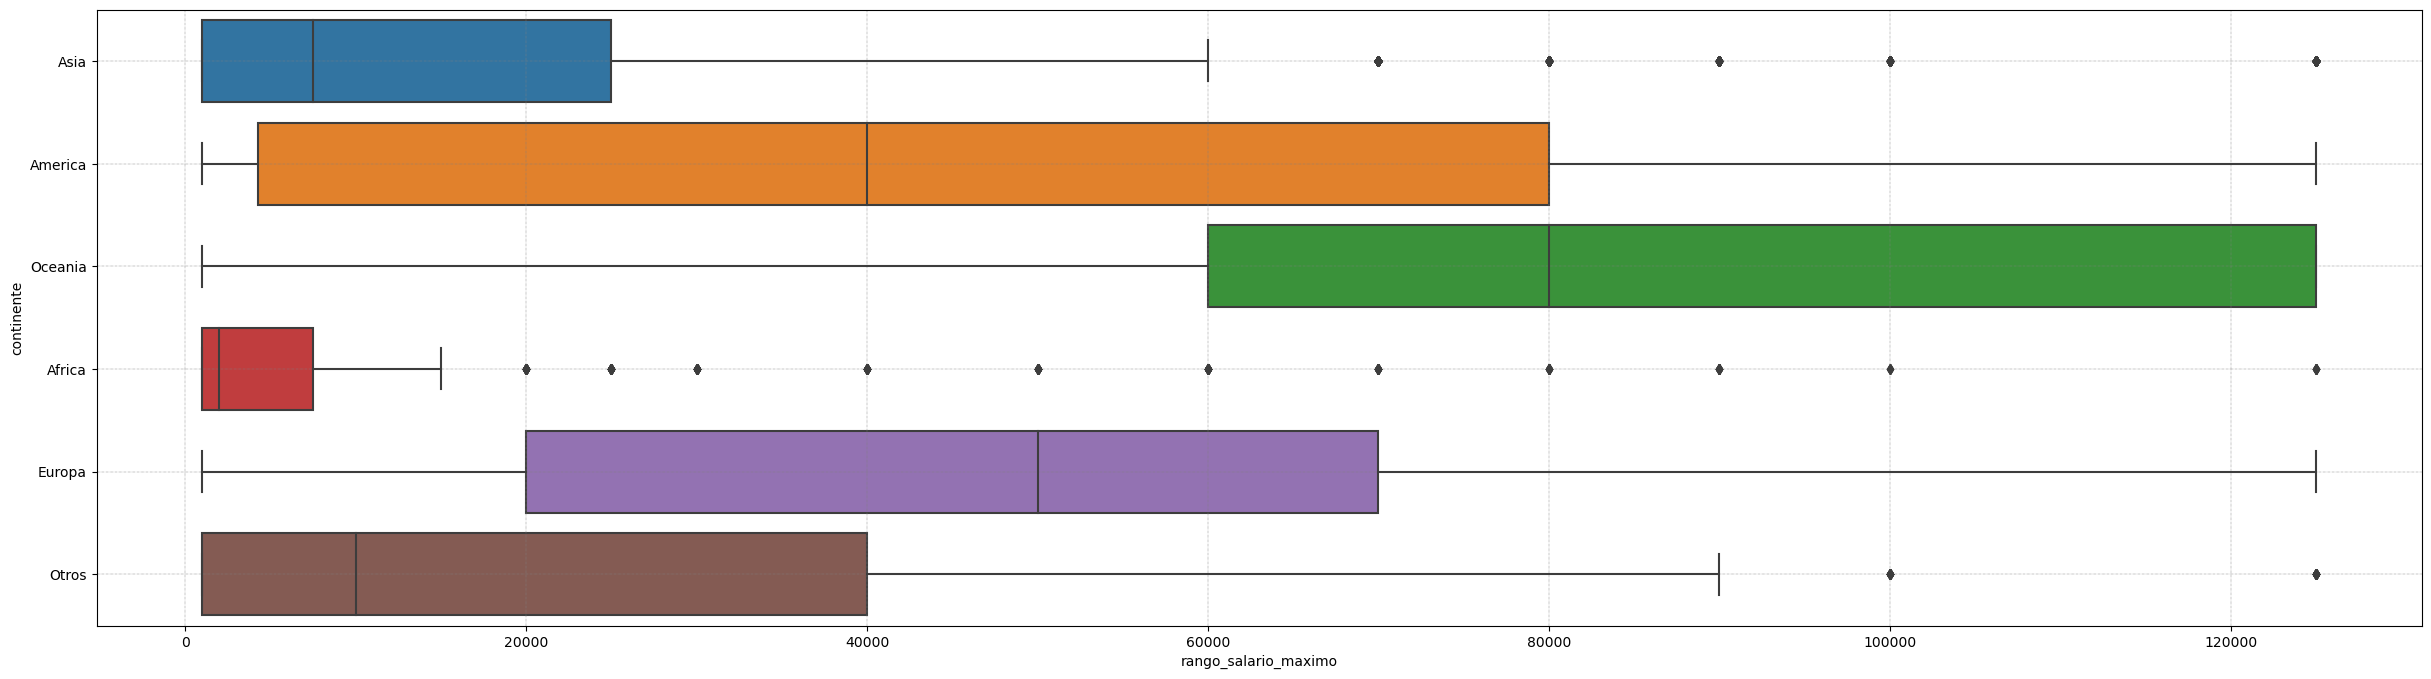

In [31]:
plt.figure(figsize=(30,8))
sns.boxplot(x= "rango_salario_maximo", y = "continente", data = df)
plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)

Cómo observamos en la gráfica el continente dónde más se cobra es Oceanía con una mediana de 80.000 $.

Entre América y Europa hay una diferencia entre la mediana y los salarios máximos, América tiene los sueldos más altos pero en Europa la mediana es más alta.

Por lo que nos quedamos para el siguiente análisis con Oceanía y Europa.

Vamos a hacer una separación entre América del Norte y América del Sur ya que pensabamos que U.S.A. era el país en el que más se cobra.

In [21]:
df_america = df[df["continente"] == "America"]
df_america.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
3,45-49,Man,Mexico,20+ years,"30,000-39,999",Academics/Education,Research Scientist,30000.0,39999.0,America
23,35-39,Man,Brazil,20+ years,"100,000-124,999",Computers/Technology,Machine Learning Engineer,100000.0,124999.0,America


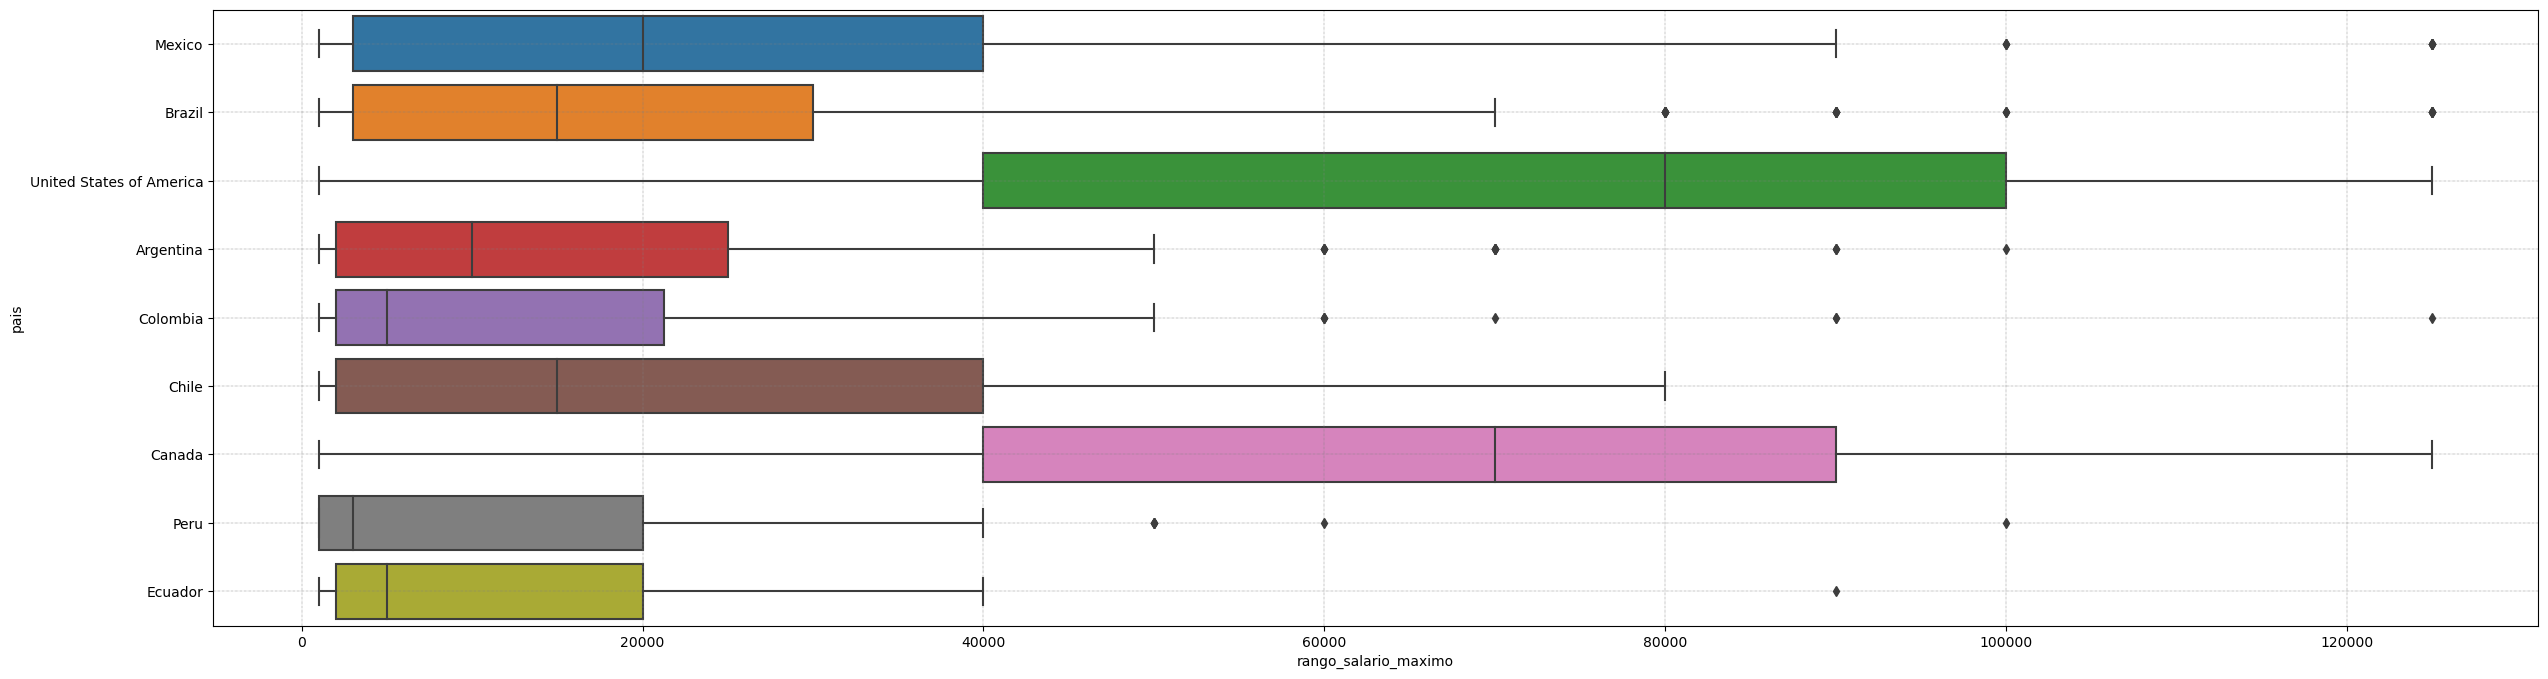

In [25]:
plt.figure(figsize=(30,8))
sns.boxplot(x= "rango_salario_maximo", y = "pais", data = df_america)
plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)

Efectivamente, en América del Norte, se cobra bastante, al igual que en Oceanía, 80.000 $.

In [26]:
df_asia = df[df["continente"] == "Asia"]
df_asia.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
0,50-54,Man,India,5-10 years,"25,000-29,999",Manufacturing/Fabrication,Other,25000.0,29999.0,Asia
1,50-54,Man,Indonesia,20+ years,"60,000-69,999",Manufacturing/Fabrication,Program/Project Manager,60000.0,69999.0,Asia


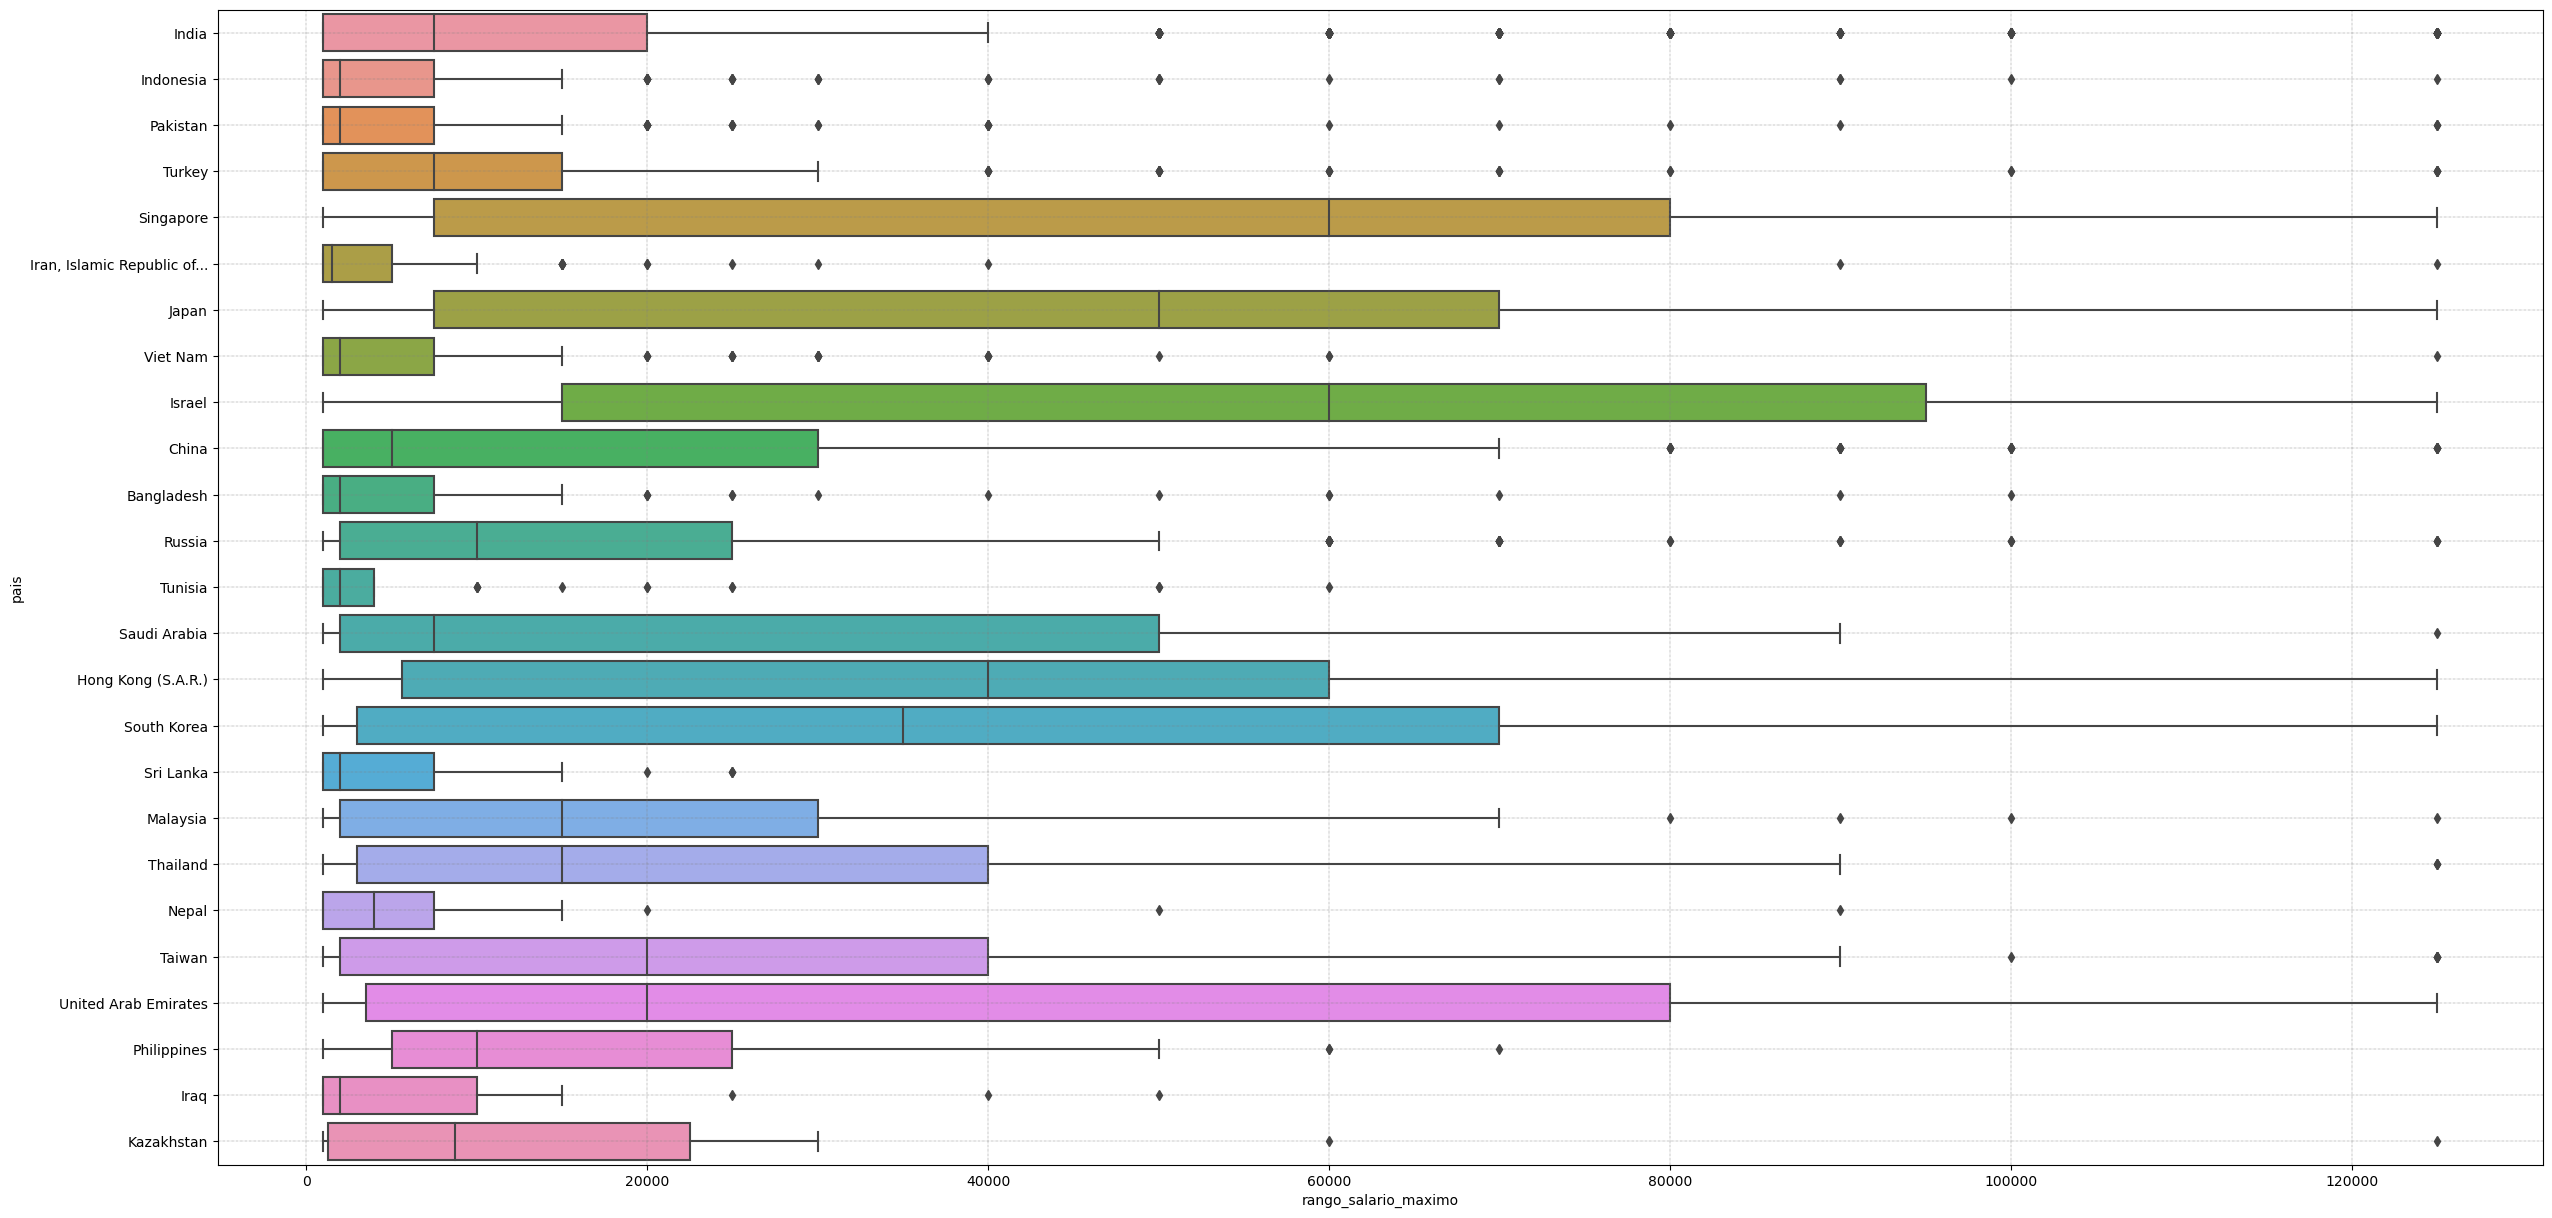

In [28]:
sns.boxplot(x= "rango_salario_maximo", y = "pais", data = df_asia)
plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)

In [14]:
df_continentes = df[(df["continente"] == "Oceania") | (df["continente"] == "Europa")]
df_continentes.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
10,40-44,Man,Australia,1-3 years,"70,000-79,999",Other,Other,70000.0,79999.0,Oceania
15,35-39,Man,Greece,10-20 years,"10,000-14,999",Academics/Education,Research Scientist,10000.0,14999.0,Europa


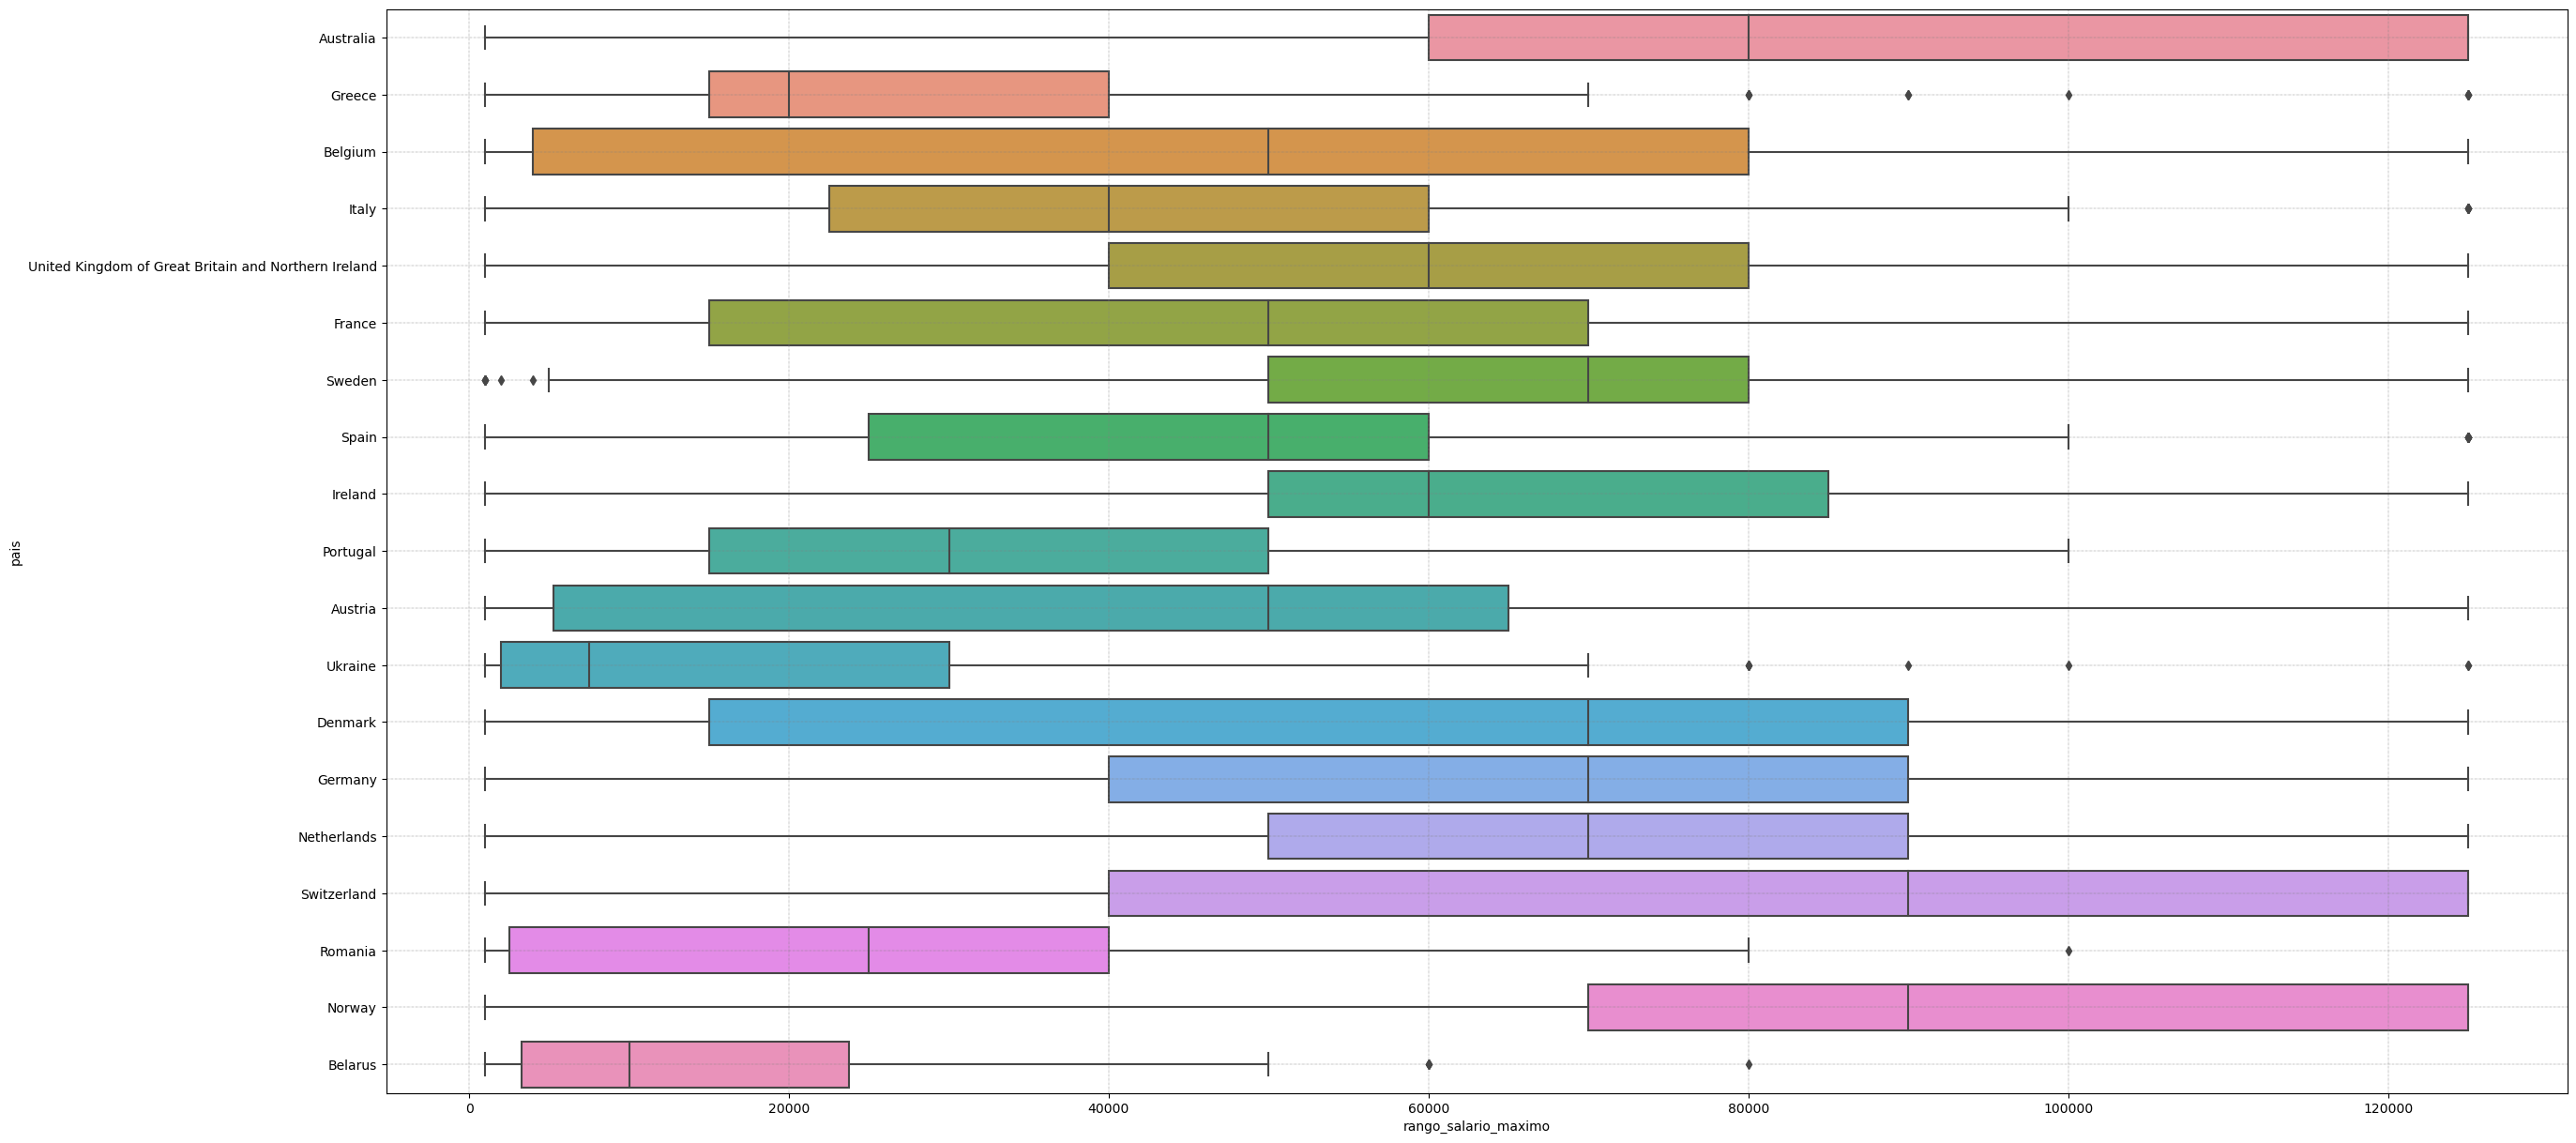

In [20]:
sns.boxplot(x= "rango_salario_maximo", y = "pais", data = df_continentes)
plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)

Seleccionando los países por continente, vemos que Europa los niveles más altos de la mediana de salarios son Switzerland y Norway con 90.000 $.
En una tercera posición tenemos empatados con 

In [29]:
proporcion_pais = df.stb.freq(["pais"])
proporcion_pais

,pais,count,percent,cumulative_count,cumulative_percent
0,India,3307,23.310073,3307,23.310073
1,United States of America,1166,8.218792,4473,31.528864
2,Other,806,5.681257,5279,37.210122
3,Japan,631,4.447734,5910,41.657856
4,Brazil,539,3.799253,6449,45.457109
...,...,...,...,...,...
61,Uganda,24,0.169169,14099,99.379714
62,Norway,22,0.155072,14121,99.534785
63,Kazakhstan,22,0.155072,14143,99.689857
64,I do not wish to disclose my location,22,0.155072,14165,99.844928


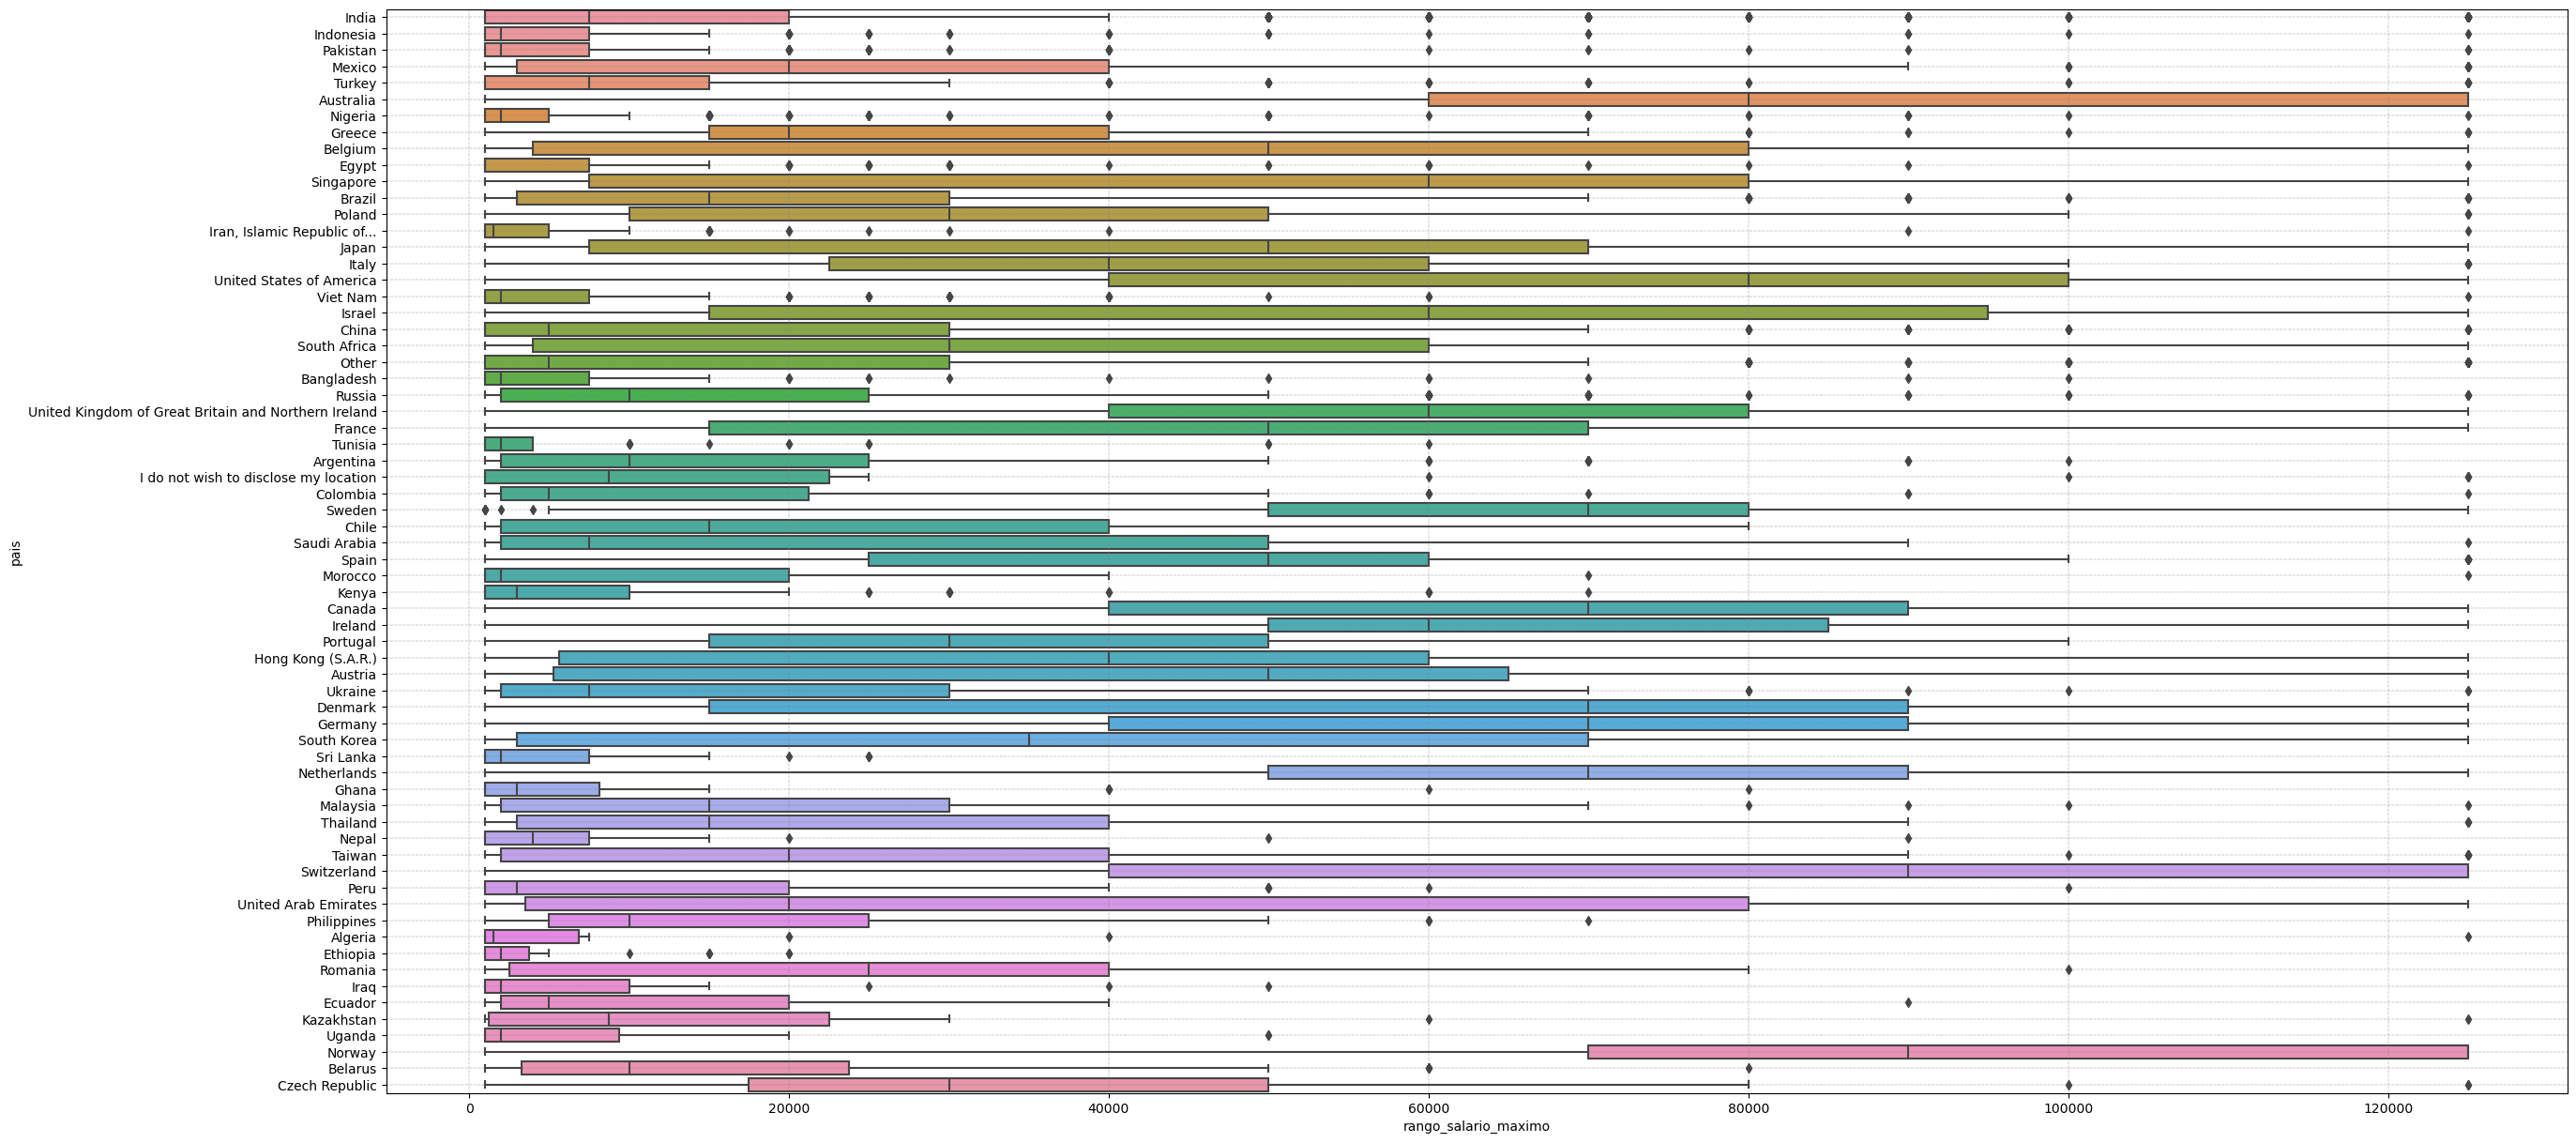

In [30]:
sns.boxplot(x= "rango_salario_maximo", y = "pais", data = df)
plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)

La mediana más alta está en 
- Switzerland y Norway con un valor de 90.000 $, 

- Australia y U.S.A. es de 80.000 $, 

- Sweeden, Canada, Denmark, Germany y Netherlands tienen una mediana de 70.000 $.

In [35]:
lista_paises = ["Switzerland", "Norway", "Australia", "United States of America", "Sweeden", "Canada", "Denmark", "Germany", "Netherlands"]

In [37]:
df_paises_top = df[df["pais"].isin(lista_paises)]
df_paises_top.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
10,40-44,Man,Australia,1-3 years,"70,000-79,999",Other,Other,70000.0,79999.0,Oceania
42,55-59,Man,United States of America,10-20 years,"15,000-19,999",Computers/Technology,Software Engineer,15000.0,19999.0,America


En base a estos países vamos a analizar en que sector se cobra más.

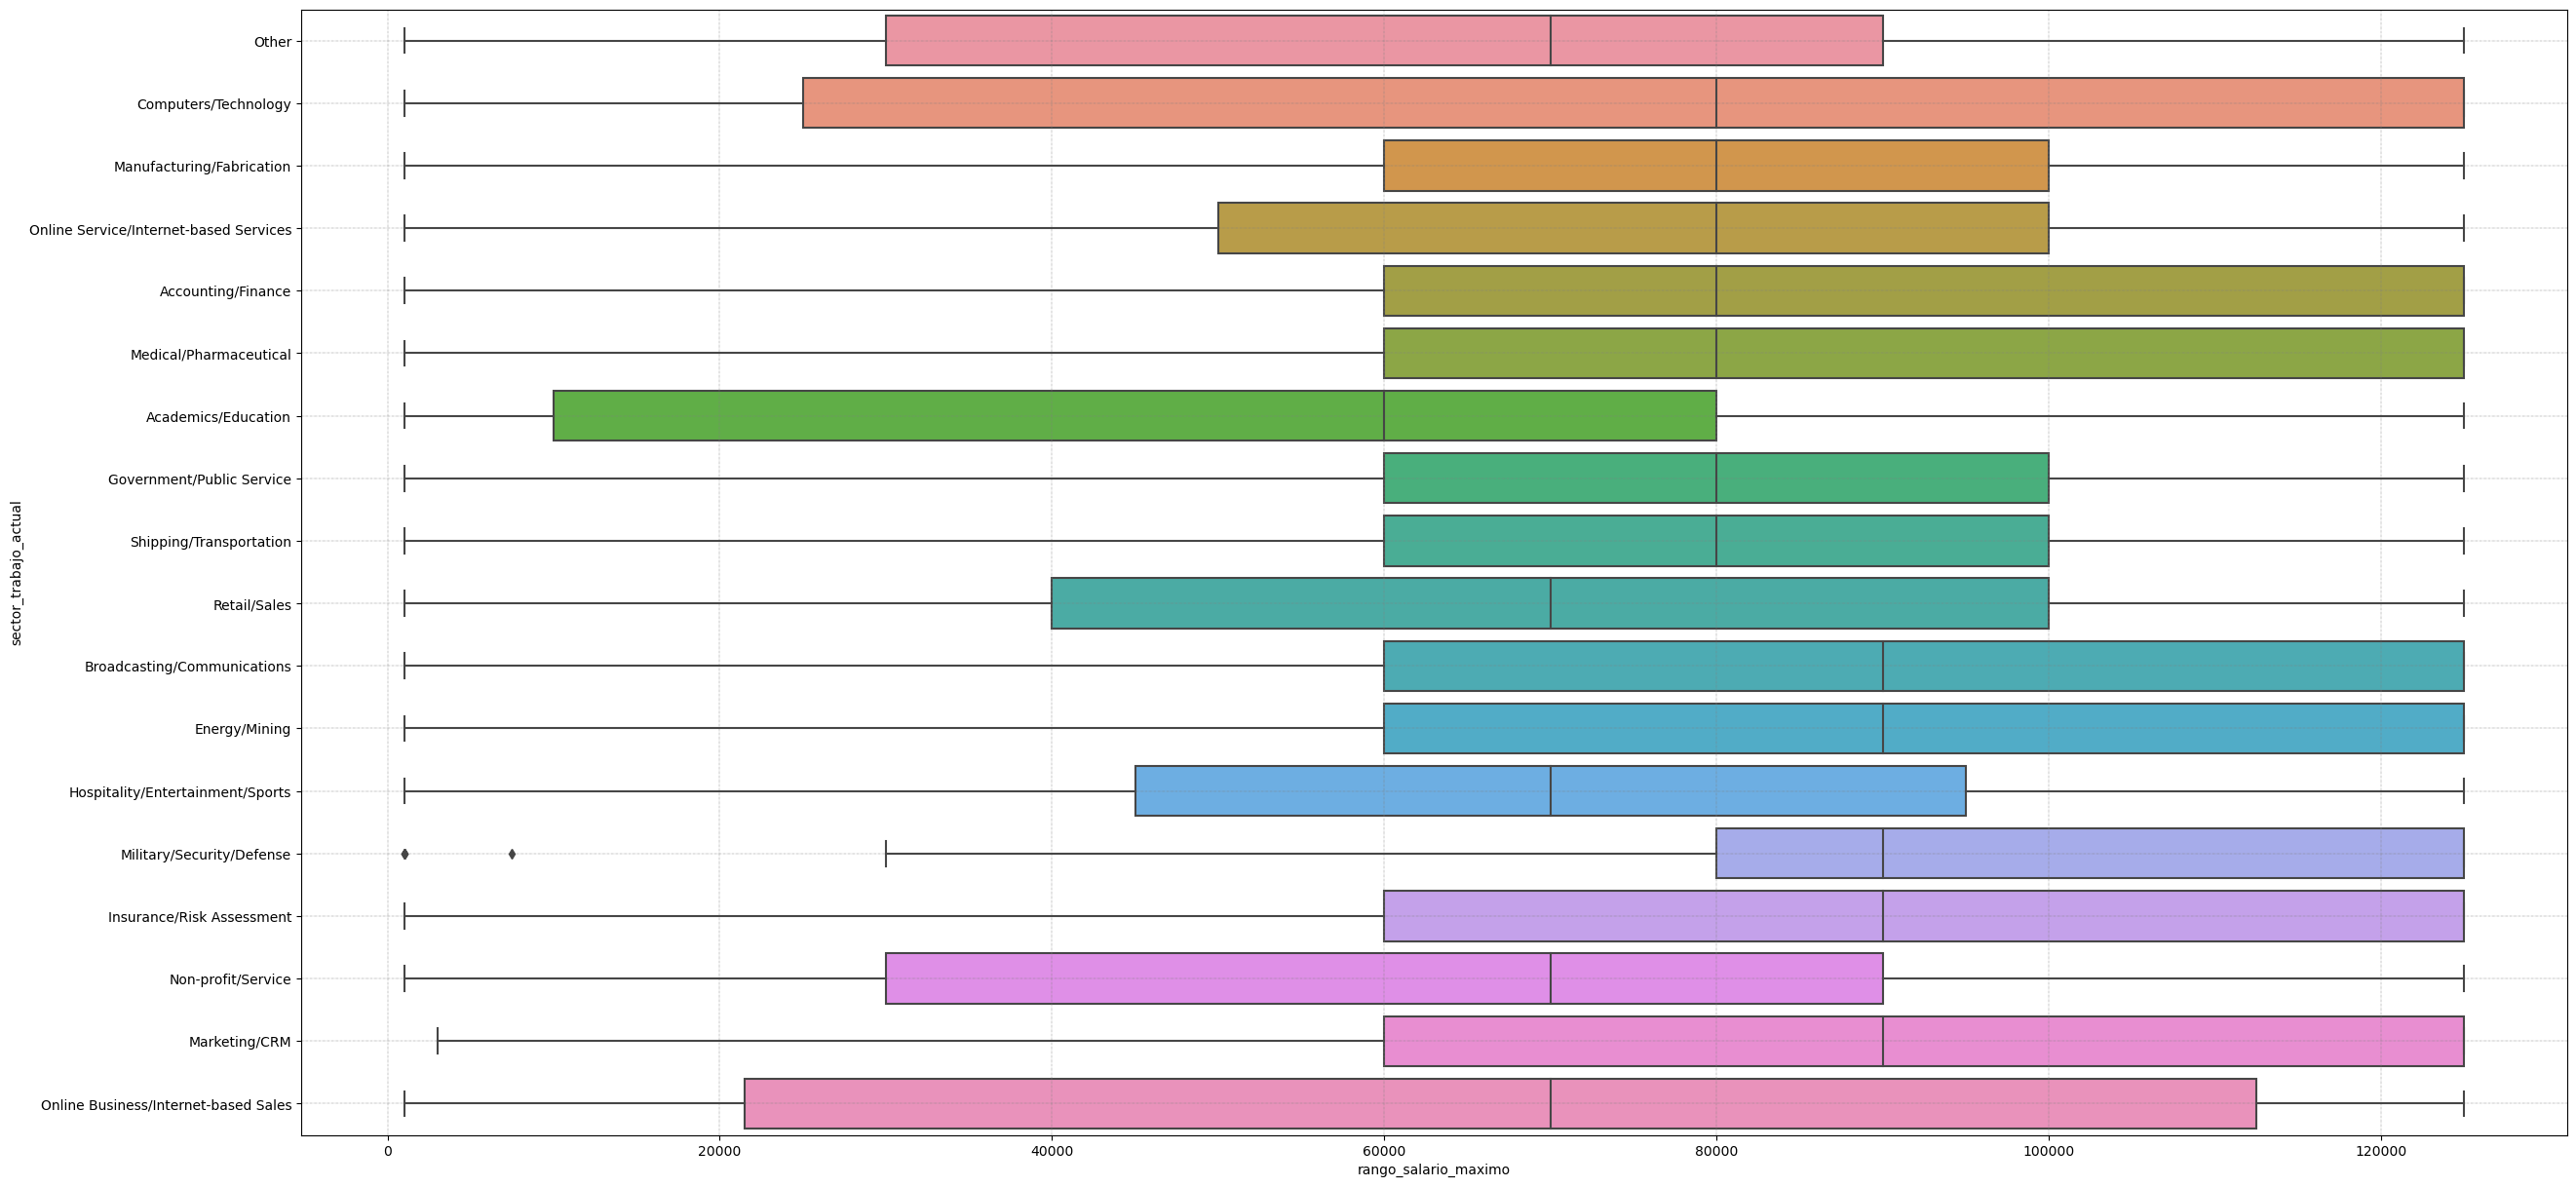

In [38]:
sns.boxplot(x= "rango_salario_maximo", y = "sector_trabajo_actual", data = df_paises_top)
plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)

Los sectores que tienen la mediana más alta con 90.000 $ son Broadcasting/Communications, Energy/Mining, Military/Security/Defense, Insurance/Risk Assessment y Marketing/CRM.

In [39]:
lista_sector = ["Broadcasting/Communications", "Energy/Mining", "Military/Security/Defense", "Insurance/Risk Assessment", "Marketing/CRM"]

In [40]:
df_pais_sector_top = df_paises_top[df_paises_top["sector_trabajo_actual"].isin(lista_sector)]
df_pais_sector_top.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
489,45-49,Man,United States of America,3-5 years,"100,000-124,999",Broadcasting/Communications,Data Engineer,100000.0,124999.0,America
547,35-39,Man,United States of America,< 1 years,"50,000-59,999",Energy/Mining,Software Engineer,50000.0,59999.0,America


Dentro de cada uno de estos sectores nos hemos preguntado, en qué puestos de trabajo se gana más.

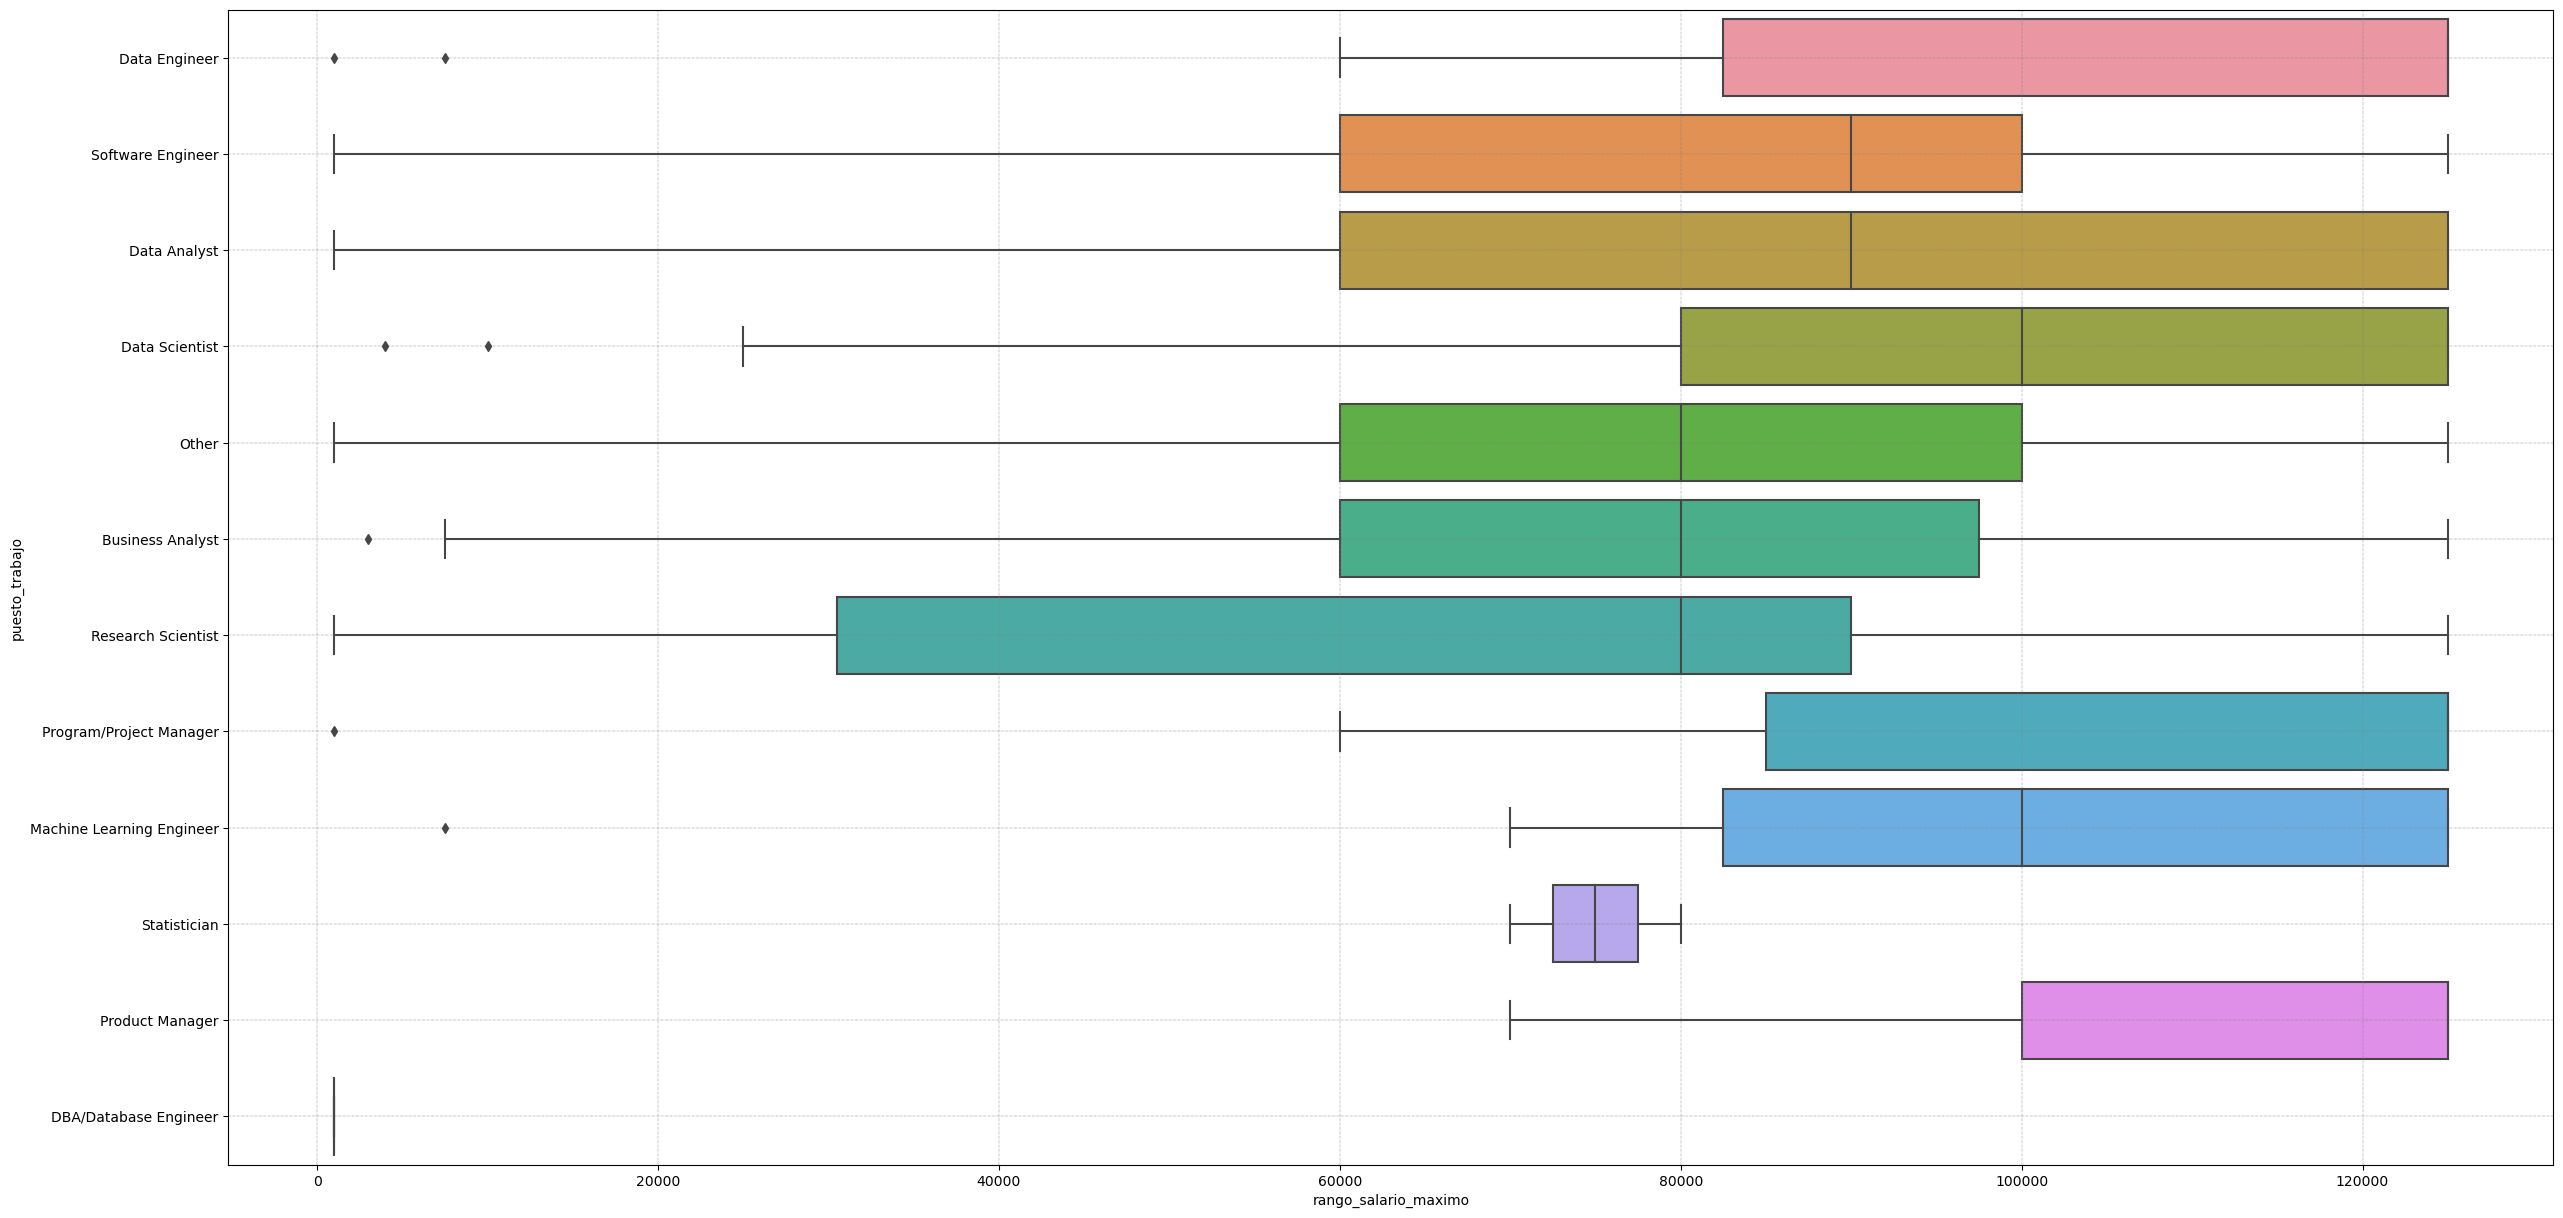

In [41]:
sns.boxplot(x= "rango_salario_maximo", y = "puesto_trabajo", data = df_pais_sector_top)
plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)

In [42]:
df_pais_sector_top["puesto_trabajo"].value_counts()

Data Scientist               66
Other                        57
Data Analyst                 45
Software Engineer            29
Business Analyst             18
Program/Project Manager      15
Data Engineer                12
Machine Learning Engineer    10
Research Scientist            7
Product Manager               5
Statistician                  2
DBA/Database Engineer         1
Name: puesto_trabajo, dtype: int64

In [43]:
df_pais_sector_top[(df_pais_sector_top["puesto_trabajo"] == "Product Manager")]

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
14875,35-39,Man,Switzerland,5-10 years,"100,000-124,999",Energy/Mining,Product Manager,100000.0,124999.0,Europa
16472,50-54,Man,Netherlands,1-3 years,"100,000-124,999",Broadcasting/Communications,Product Manager,100000.0,124999.0,Europa
19244,35-39,Man,United States of America,1-3 years,"100,000-124,999",Energy/Mining,Product Manager,100000.0,124999.0,America
21173,25-29,Man,Denmark,5-10 years,"60,000-69,999",Energy/Mining,Product Manager,60000.0,69999.0,Europa
23251,35-39,Man,Germany,10-20 years,"90,000-99,999",Energy/Mining,Product Manager,90000.0,99999.0,Europa


In [45]:
df_pais_sector_top[(df_pais_sector_top["puesto_trabajo"] == "Data Engineer")]

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
489,45-49,Man,United States of America,3-5 years,"100,000-124,999",Broadcasting/Communications,Data Engineer,100000.0,124999.0,America
1872,30-34,Man,Canada,3-5 years,"80,000-89,999",Insurance/Risk Assessment,Data Engineer,80000.0,89999.0,America
7830,30-34,Man,United States of America,10-20 years,"100,000-124,999",Military/Security/Defense,Data Engineer,100000.0,124999.0,America
8281,50-54,Man,United States of America,10-20 years,"100,000-124,999",Broadcasting/Communications,Data Engineer,100000.0,124999.0,America
9519,30-34,Man,United States of America,5-10 years,"80,000-89,999",Insurance/Risk Assessment,Data Engineer,80000.0,89999.0,America
10842,22-24,Man,United States of America,5-10 years,"100,000-124,999",Broadcasting/Communications,Data Engineer,100000.0,124999.0,America
10997,30-34,Man,Netherlands,3-5 years,"50,000-59,999",Insurance/Risk Assessment,Data Engineer,50000.0,59999.0,Europa
11323,35-39,Woman,Germany,1-3 years,"100,000-124,999",Broadcasting/Communications,Data Engineer,100000.0,124999.0,Europa
15334,25-29,Man,Germany,1-3 years,$0-999,Insurance/Risk Assessment,Data Engineer,0.0,999.0,Europa
19108,30-34,Man,Germany,5-10 years,"5,000-7,499",Insurance/Risk Assessment,Data Engineer,5000.0,7499.0,Europa


Los puestos de trabajo que tienen la mediana más alta son Product Manager, Data Engineer y Program/Project Manager con 124.999 $

Ahora vamos cuál es la experiencia (años trabajando)

In [46]:
lista_puesto_trabajo = ["Product Manager", "Data Engineer", "Program/Project Manager"]

In [ ]:
df_pais_sector_años_trabajando_top = df_paises_top[df_paises_top["sector_trabajo_actual"].isin(lista_puesto_trabajo)]
df_pais_sector_años_trabajando_top.head(2)